In [8]:
import os
import wandb
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
import cv2

In [16]:
# Пути к изображениям и меткам датасета Dental disease detection.

path_to_data_val_img = "ML_System_Design/Occlusal_caries_detection.v2i.yolov5pytorch/valid/images/"

val_images_list = os.listdir(path_to_data_val_img)

path_to_data_val_lbl = "ML_System_Design/Occlusal_caries_detection.v2i.yolov5pytorch/valid/labels/"

val_labels_list = os.listdir(path_to_data_val_lbl)

In [17]:
print(val_images_list[:5])
print()
print(val_labels_list[:5])

['2022-Picture10-max_png.rf.9ca4cbf0b54f26c97e8b32e138a2326b.jpg', '2022-Picture11-mand_jpg.rf.d551bab05b68bb58e3e6307ec924a109.jpg', '2022-Picture12-mand_png.rf.ed3bc77e2439c4e237dcee8ff0299f3a.jpg', '2022-Picture13-mand_png.rf.442d1866f5a7b2aa01d1d04d895e69f4.jpg', '2022-Picture14-max_png.rf.8d4839a7362f3b7f0bbe2823748b686a.jpg']

['2022-Picture10-max_png.rf.9ca4cbf0b54f26c97e8b32e138a2326b.txt', '2022-Picture11-mand_jpg.rf.d551bab05b68bb58e3e6307ec924a109.txt', '2022-Picture12-mand_png.rf.ed3bc77e2439c4e237dcee8ff0299f3a.txt', '2022-Picture13-mand_png.rf.442d1866f5a7b2aa01d1d04d895e69f4.txt', '2022-Picture14-max_png.rf.8d4839a7362f3b7f0bbe2823748b686a.txt']


In [18]:
# Функция для выбора класса по кариесу и перевода координат из COCO формата в человеческий. 
def compute_coordinates(file_name, file_name_image):
    
    coordinates_list = []
    im = Image.open(path_to_data_val_img + file_name_image)
    image_width, image_height = im.size

    with open(file_name, "r") as file:
        
        # итерация по строкам текстового файла
        for line in file:
            coordinates = line.strip().split()
            if coordinates[0] == "0":
                coordinates = coordinates[1:]
                coordinates[0] = float(coordinates[0])*image_width
                coordinates[1] = float(coordinates[1])*image_height
                coordinates[2] = float(coordinates[2])*image_width
                coordinates[3] = float(coordinates[3])*image_height
                
                
                coordinates[0] = coordinates[0] - coordinates[2]/2
                coordinates[1] = coordinates[1] - coordinates[3]/2
            
                print(coordinates)
                coordinates_list.append(coordinates)
            
    file.close       
    
    return coordinates_list


# Функция для отрисовки баундинг боксов на изображениях. Нам нужно сделать наложение чтобы посмотреть качество разметки.
def draw_bbox(image_fullname, image_name, coord):
    
    im = Image.open(image_fullname)
    img = cv2.imread(image_fullname,1) 

    if len(coord) != 0:
               
        fig, ax = plt.subplots()
        ax.imshow(im)

        for box in coord:
            rect = patches.Rectangle((box[0], box[1]), box[2], box[3], linewidth=1, edgecolor='r', facecolor='none')
            cv2.rectangle(img, (int(box[0]), int(box[1])), ( int(box[0] + box[2]), int(box[1] + box[3])), (0, 0, 255), 2) 
            ax.add_patch(rect)
            
        cv2.imwrite("out_val_Occlusal_caries_detection/" + image_name, img)
        plt.show()
    
    else:
        pass          

[553.75, 425.75, 47.5, 41.5]
[575.25, 392.5, 23.5, 21.0]


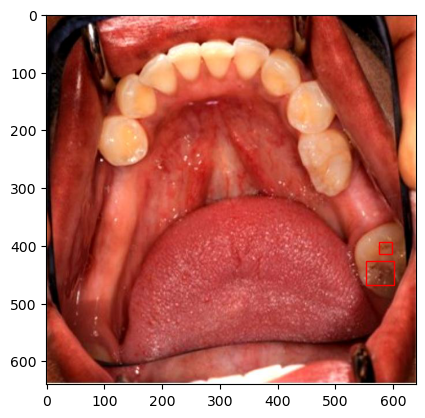

[69.0, 423.0, 62.0, 94.0]
[91.5, 329.75, 40.0, 76.5]
[109.5, 199.75, 53.0, 123.5]
[143.25, 85.5, 38.5, 87.0]
[443.75, 52.0, 41.5, 86.0]
[497.0, 149.0, 36.0, 83.0]
[519.0, 276.0, 39.0, 82.0]
[479.75, 496.75, 59.5, 67.5]
[34.0, 559.0, 46.0, 62.0]


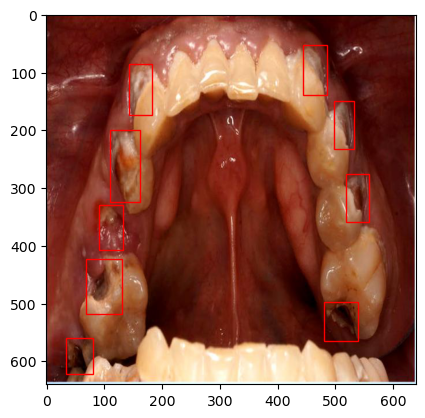

[122.0, 241.5, 30.0, 59.0]
[501.25, 329.0, 30.5, 72.0]
[480.5, 218.5, 25.0, 25.0]


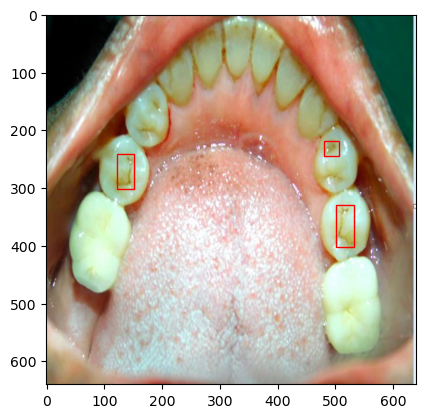

[104.25, 242.0, 86.5, 82.0]


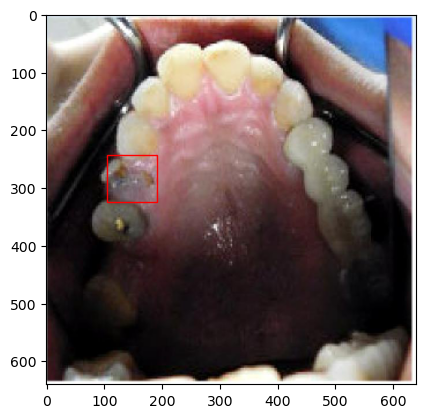

[111.5, 369.25, 30.0, 51.5]


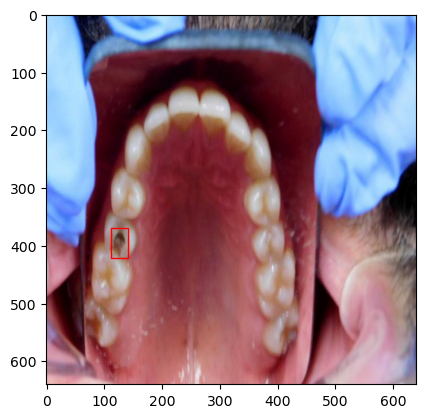

[591.25, 123.75, 26.5, 17.5]
[581.75, 37.75, 12.5, 30.5]
[143.75, 371.5, 14.5, 39.0]


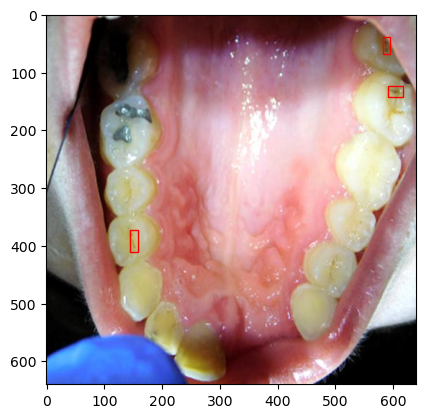

[110.5, 392.25, 8.0, 15.5]
[172.0, 334.0, 10.0, 12.0]


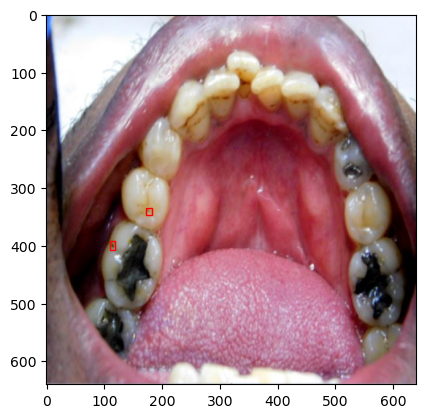

[282.5, 96.5, 27.0, 67.0]


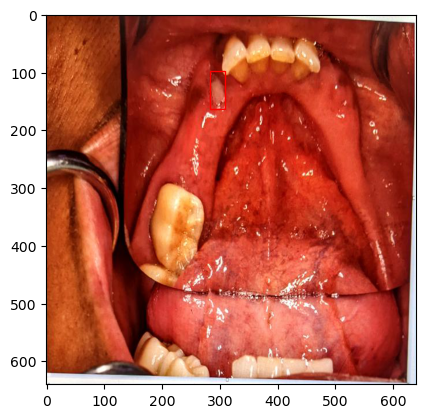

[151.0, 338.25, 19.0, 16.5]
[166.5, 368.0, 11.0, 26.0]
[446.5, 318.0, 20.0, 24.0]
[419.25, 426.0, 10.5, 13.0]
[510.75, 88.0, 21.5, 23.0]
[181.5, 450.0, 12.0, 14.0]


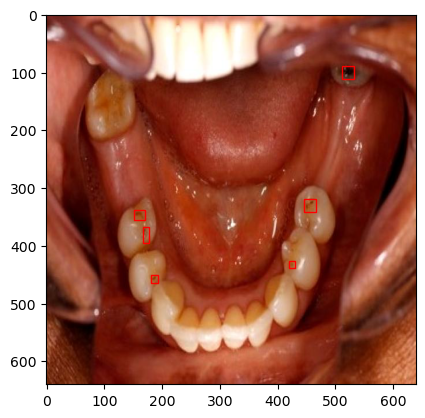

[136.75, 258.75, 11.5, 45.5]
[134.75, 435.5, 7.5, 11.0]
[519.75, 337.5, 10.5, 34.0]
[519.75, 465.75, 44.5, 70.5]


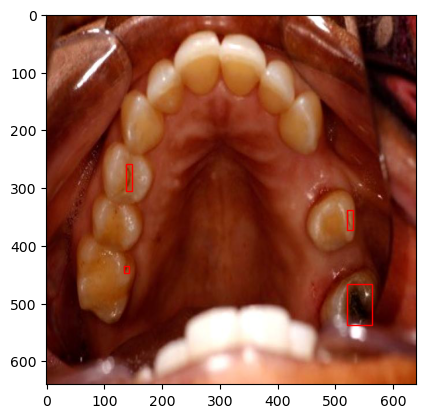

[64.25, 112.75, 61.5, 72.5]
[212.25, 429.5, 23.5, 27.0]


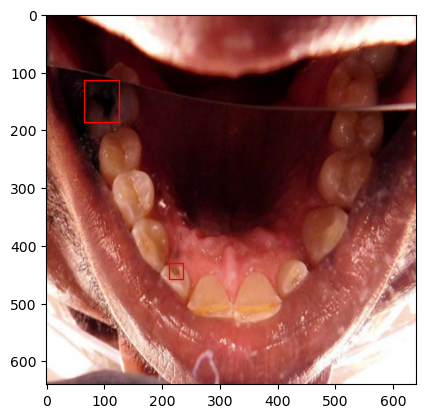

[136.5, 393.0, 52.0, 23.0]


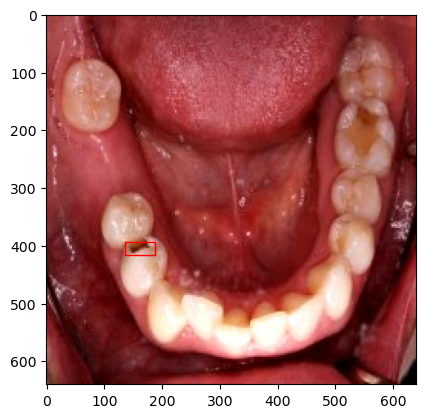

[77.25, 359.25, 85.5, 72.5]


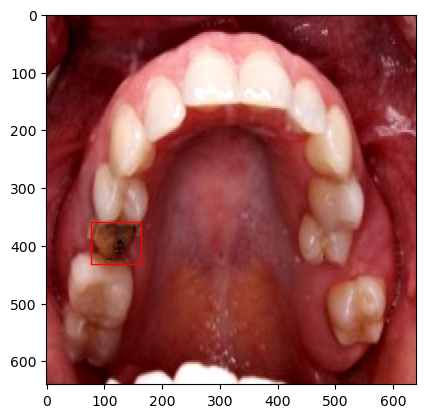

[541.0, 487.0, 28.0, 27.0]


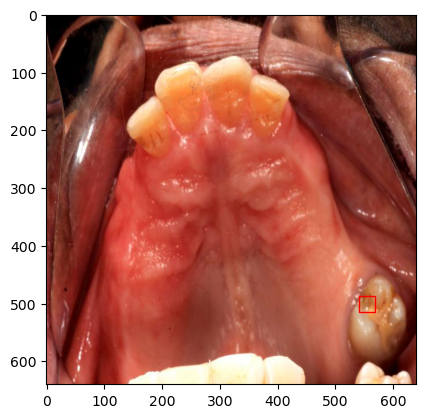

[65.25, 554.0, 79.5, 86.0]
[360.75, 54.5, 63.5, 66.0]
[111.25, 406.0, 37.5, 77.0]


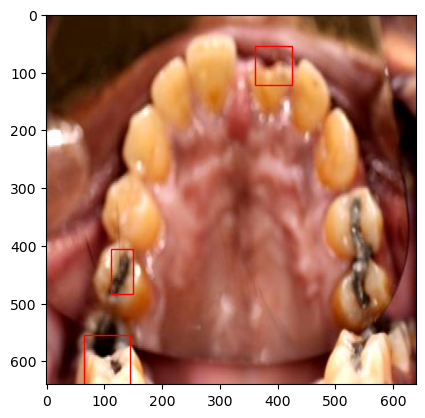

[441.5, 375.5, 21.0, 22.0]
[456.25, 359.25, 27.5, 17.5]


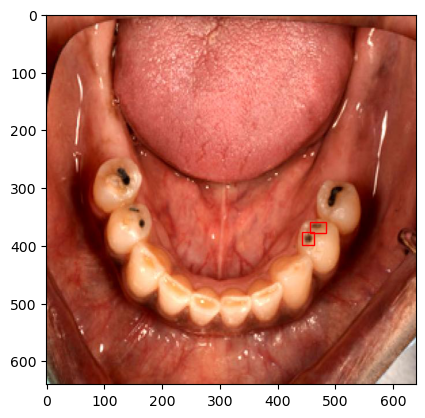

[392.5, 375.25, 21.0, 25.5]
[414.75, 397.0, 27.5, 33.0]


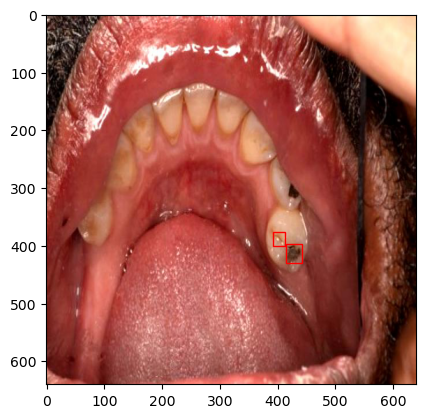

[500.5, 258.5, 75.0, 70.0]
[510.5, 360.5, 23.0, 46.0]
[545.0, 339.25, 46.0, 49.5]
[507.5, 410.25, 27.0, 25.5]
[523.75, 208.75, 14.5, 52.5]


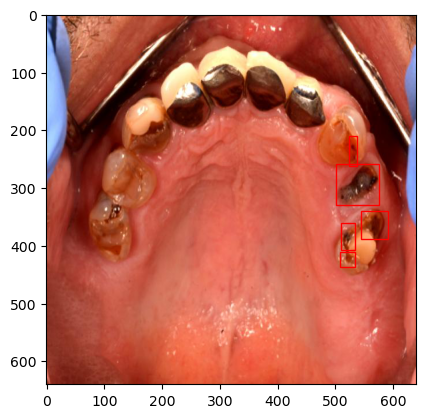

[511.0, 484.0, 83.0, 156.0]


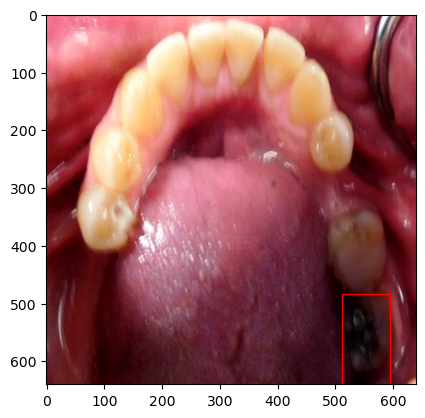

[124.25, 378.0, 30.5, 46.0]


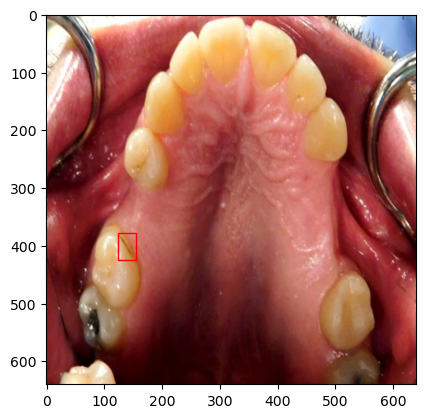

[65.25, 506.25, 18.5, 45.5]
[108.0, 374.0, 10.0, 31.0]


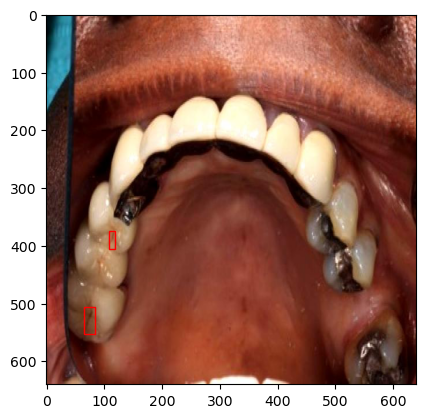

[182.0, 299.75, 15.0, 22.5]
[209.5, 359.5, 16.0, 22.0]
[455.5, 318.5, 10.0, 12.0]


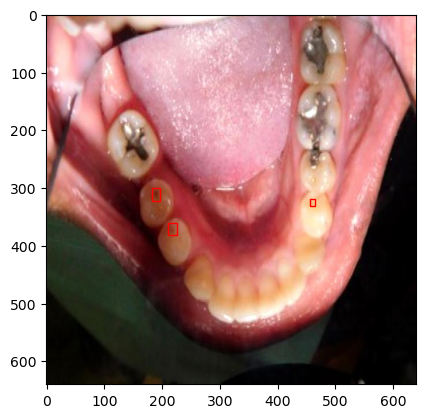

[144.75, 369.0, 16.5, 25.0]
[498.25, 317.5, 79.5, 79.0]


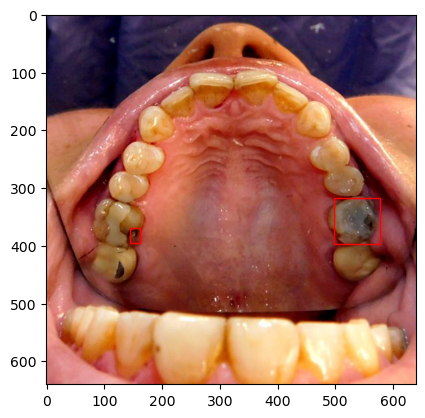

[118.75, 313.75, 18.5, 22.5]


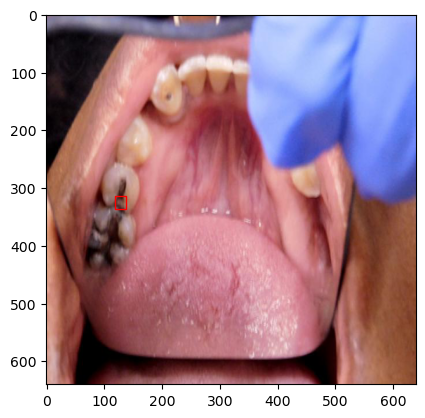

[77.0, 283.0, 76.0, 66.0]
[69.0, 410.25, 57.0, 88.5]
[502.25, 405.75, 84.5, 51.5]
[513.0, 474.75, 80.0, 58.5]
[266.75, 27.25, 13.5, 33.5]
[162.75, 138.75, 23.5, 24.5]


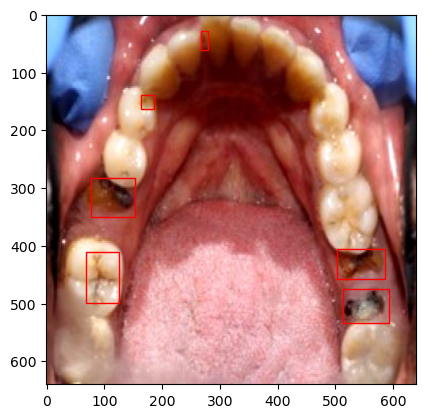

[524.25, 466.75, 84.5, 77.5]
[33.75, 464.0, 76.5, 58.0]


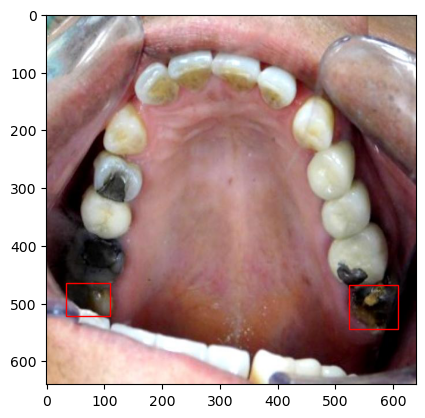

[415.5, 258.25, 82.0, 51.5]


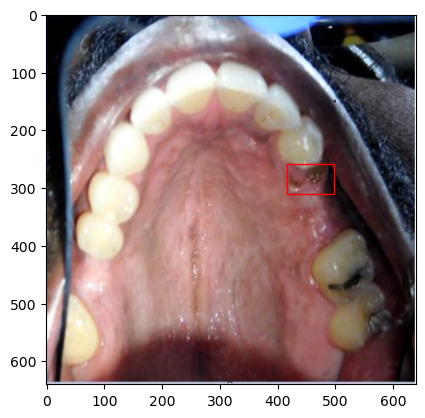

[520.0, 375.75, 17.0, 27.5]


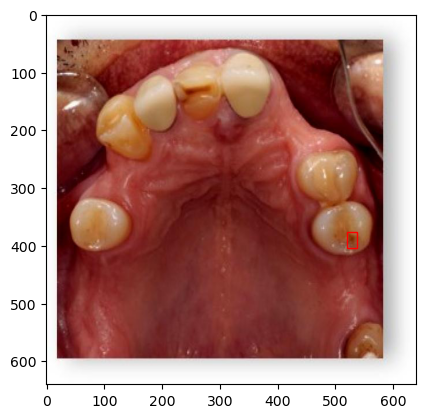

[480.0, 361.25, 6.0, 19.5]


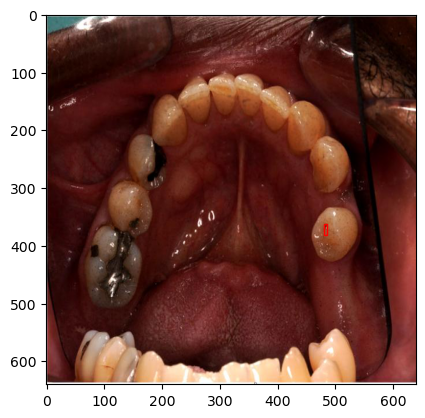

In [19]:
# Пройдемся по всем файлам с разметкой.
# Изображения могут иметь разный формат, это тоже учтём.

for file_name in tr_labels_list:
    file_name_jpg = file_name[:file_name.find(".txt")] + ".jpg"
    file_name_jpeg = file_name[:file_name.find(".txt")] + ".jpeg"
    
    if file_name_jpg in val_images_list:        
        file_name_image = file_name_jpg
        
    elif file_name_jpeg in val_images_list:        
        file_name_image = file_name_jpeg
    
    else:
        file_name_image = ""
        
    if file_name_image != "":
        coordinates_list = compute_coordinates(path_to_data_val_lbl + file_name, file_name_image)

        draw_bbox(path_to_data_val_img + file_name_image, file_name_image, coordinates_list) 
        
    else:
        pass
    